Handling spectral energy distributions
==============================

This notebook illustrates how to use the `sed` module of [`nmmn`](https://github.com/rsnemmen/nmmn). This module is very convenient for dealing with spectral energy distributions (SEDs)—the distributions of luminosity $\nu L_\nu$ as a function of $\nu$. 

Often, we have different SEDs, for example the emission from different components of a flow, or spectra corresponding to different AGNs, and we want to perform operations on them. For example, we may want to sum them up, or average them, or compute the bolometric luminosity. This module does it all and this notebook illustrates some of the functionalities.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nmmn.sed as sed

- [x] read data
- [ ] compute some useful quantities
- [ ] add SEDs
- [ ] compute average SED
- [ ] plot a SED

# Read the SED data files

We will import model SEDs corresponding to the components of the flow appropriate for NGC 3031 as reported in [Nemmen et al (2014)](https://academic.oup.com/mnras/article/438/4/2804/2907740): a radiatively inefficient accretion flow (aka RIAF), a thin disk and a relativistic jet. 

Each file consists of two columns which are $\log \nu$ (Hz) and $\log \nu L_\nu$ (erg/s), respectively. The `logfmt` parameter makes sure we read them correctly.

In [3]:
riaf=sed.SED(file='/Users/nemmen/Dropbox/codes/python/nmmn/docs/ngc3031.adaf',logfmt=1)
thin=sed.SED(file='/Users/nemmen/Dropbox/codes/python/nmmn/docs/ngc3031.ssd',logfmt=1)
jet=sed.SED(file='/Users/nemmen/Dropbox/codes/python/nmmn/docs/ngc3031.jet',logfmt=1)

Just to make sure we read them correctly, let's plot the SEDs

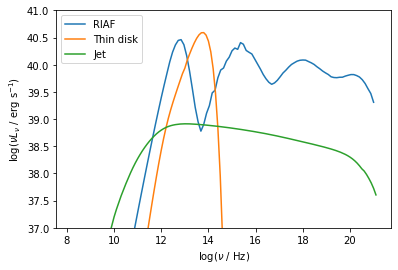

In [4]:
plot(riaf.lognu,riaf.ll,label='RIAF')
plot(thin.lognu,thin.ll,label='Thin disk')
plot(jet.lognu,jet.ll,label='Jet')
ylim(37,41)
xlabel('log($\\nu$ / Hz)')
ylabel('log($\\nu L_\\nu$ / erg s$^{-1}$)')
legend()

`sed` support several different types of input formats for the SEDs.

# Compute the bolometric luminosity and other properties

In [5]:
	lumx[k]=s.xrays()[0]
	lumbolm[k]=s.bol()
	rlm[k]=s.radioloud()	# radio-loudness
	lumrad[k]=s.findlum(9.7)[1]*(10**s.findlum(9.7)[0])	# nuLnu at 5 GHz
	alphaox[k]=s.alphaox()	# alpha_ox

NameError: name 's' is not defined